In [1]:
import operator
import numpy as np
import os
from csv import DictReader
import matplotlib.pyplot as plt

datoteke = os.listdir("podatki/")
podatki_o_vozilih = []
for dat in datoteke:
    if "Podatki" in dat and "2020" not in dat:
        neki = DictReader(open('podatki/' + dat, 'rt', encoding='ANSI'), delimiter=';')
        for i in neki:
            if i["P.1.3-Vrsta goriva (opis)"] == "Bencin" and i["Status vozila (opis)"] != "odjavljeno":
                podatki_o_vozilih.append([i["P.1.3-Vrsta goriva (opis)"], dat[8:-4]])
                
podatki_o_vozilih = np.array(podatki_o_vozilih)

# Preberem podatke in si shranim nove avte z bencinom

In [2]:
# Grupiram po mesecih
bencin1 = dict()
for i in podatki_o_vozilih:
    if i[1] not in bencin1:
        bencin1[i[1]] = 0
    bencin1[i[1]] += 1

In [3]:
# Spremenim ključ, da bo prikaz x-osi na grafu lepši
leta = dict()
for i in bencin1:
    a = str(i)
    if a[-2:] not in leta:
        leta[a[-2:]] = []
    leta[a[-2:]].append(bencin1[i])

In [4]:
# Napolnim seznam x in y... x so meseci in leta za X-os na grafu.. y je število novih bencinskih vozil
x = []
y = []
stevec = 1
for i in leta:
    stevec = 1
    for j in leta[i]:
        y.append(j)
        x.append(str(stevec) + "_" + str(i))
        stevec += 1

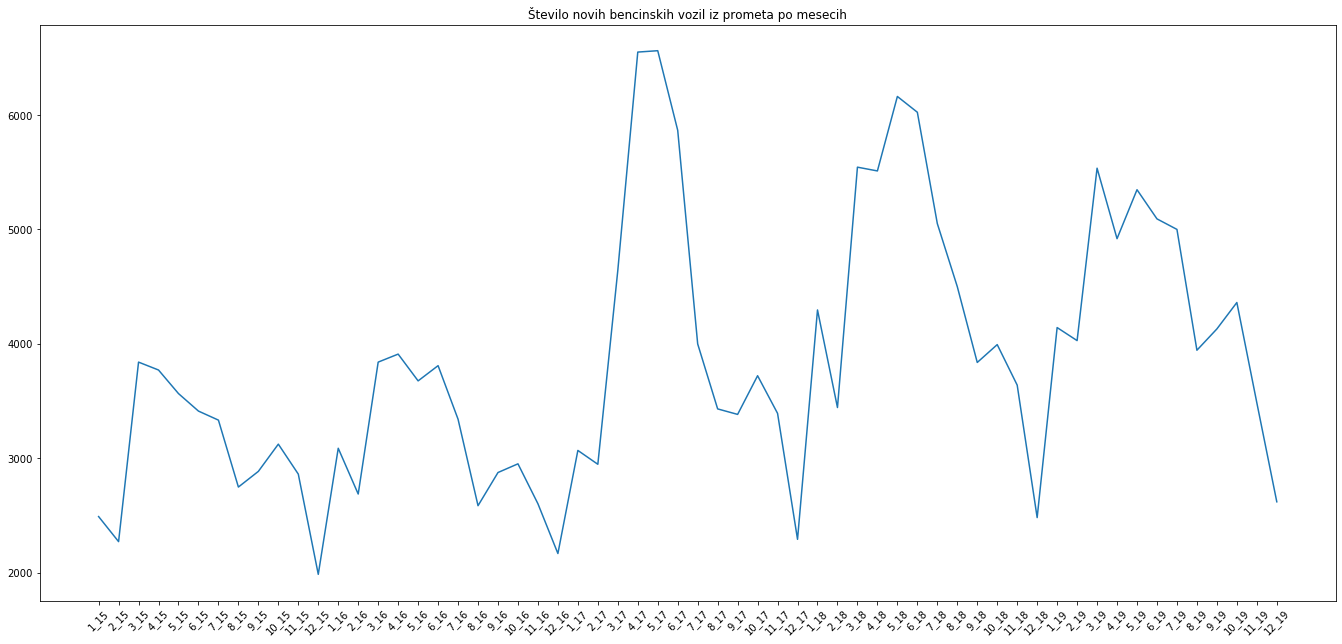

In [5]:
# Izris grafa števila novih bencinskih vozil
plt.axes([0, 0.6, 3, 2])
plt.xticks(rotation=45)
plt.title("Število novih bencinskih vozil iz prometa po mesecih")
plt.plot(x,y)

In [6]:
# Branje datoteke s ceno goriv 
from docx import Document
from datetime import datetime

bencinDoc = Document('podatki/Neosvincen-motorn-bencin-95-oktanski.docx')
dizelDoc = Document('podatki/Dizelsko-gorivo.docx')

bencin = dict()
dizel = dict()

for table in bencinDoc.tables:
    for row in table.rows[1:]:
        cena_goriva = float(row.cells[7].text.replace(',','.'))
        datum = datetime.strptime(row.cells[0].text, '%d.%m.%Y')
        leto = datum.strftime("%Y")
        mesec = datum.strftime("%m")
        kljuc = mesec + "_" + leto
        if datum.year <= 2019 and datum.year >= 2015:
            if kljuc not in bencin:
                bencin[kljuc] = []
            bencin[kljuc].append(cena_goriva)
        if datum.year < 2015:
            break

for table in dizelDoc.tables:
    for row in table.rows[1:]:
        cena_goriva = float(row.cells[7].text.replace(',','.'))
        datum = datetime.strptime(row.cells[0].text, '%d.%m.%Y')
        leto = datum.strftime("%Y")
        mesec = datum.strftime("%m")
        kljuc = mesec + "_" + leto
        if datum.year <= 2019 and datum.year >= 2015:
            if kljuc not in dizel:
                dizel[kljuc] = []
            dizel[kljuc].append(cena_goriva)
        if datum.year < 2015:
            break


In [7]:
# Ker se cene goriv spreminjajo na 14 dni, je zapisov o ceni goriva več kot 60 (12 mesecev X 5 let), vzamem povprečje cene za vsak mesec
for i in bencin:
    bencin[i] = sum(bencin[i]) / len(bencin[i])

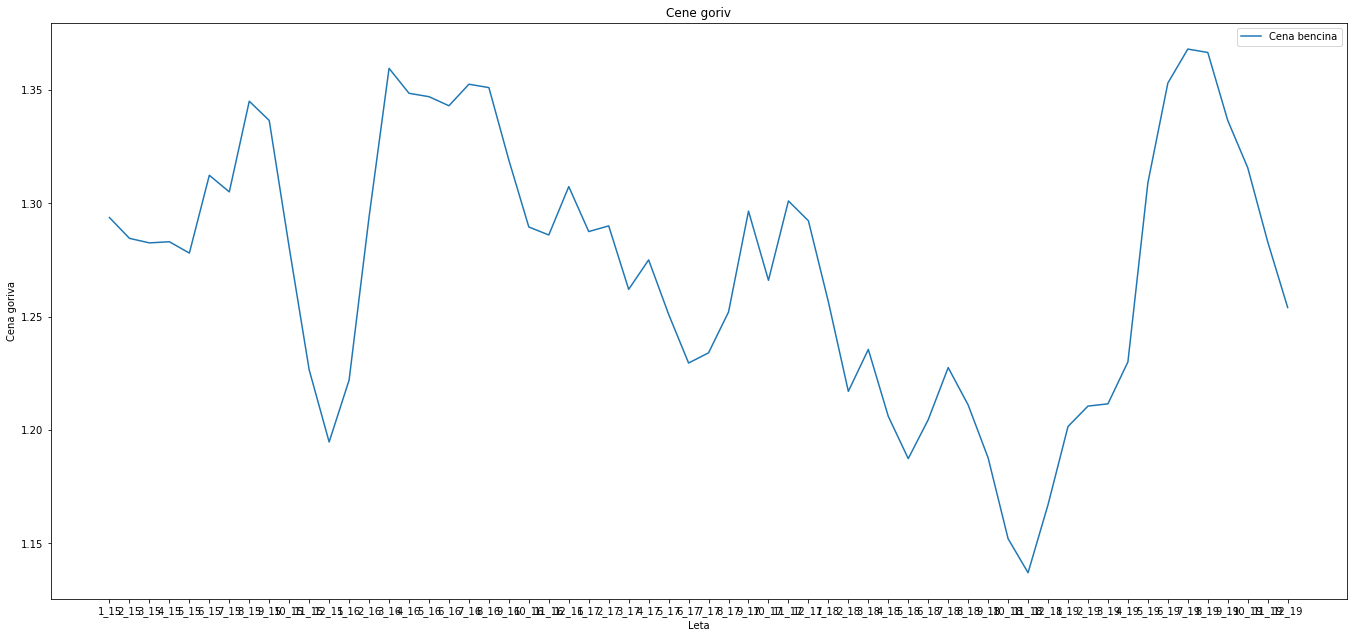

In [8]:
#Izrišem graf cene bencina
plt.axes([0, 0.6, 3, 2])
plt.plot(x, [i for i in bencin.values()], label='Cena bencina')
plt.title('Cene goriv')
plt.xlabel('Leta')
plt.ylabel('Cena goriva')

plt.legend()
plt.show()


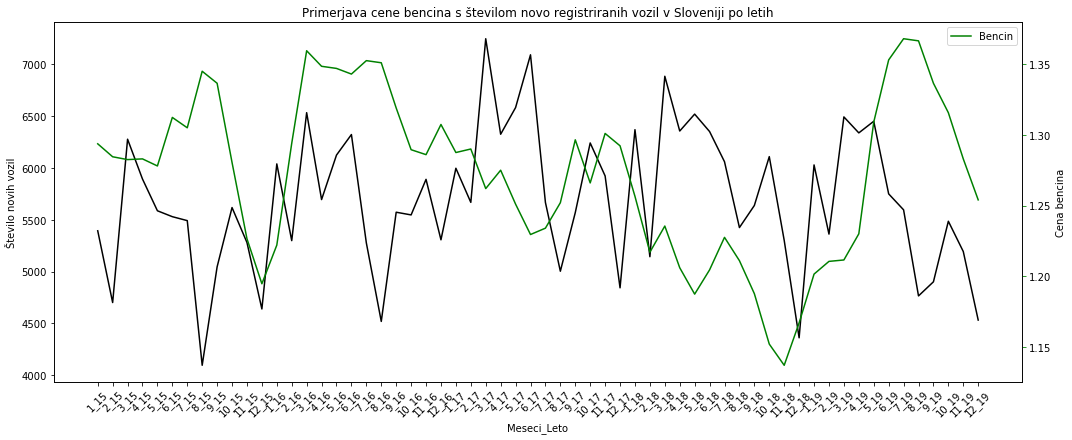

In [15]:
# Kombinacija dveh grafov na enem prikazu

y_bencin = [i for i in bencin.values()]
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
ax1.set_xlabel('Meseci_Leto')
ax1.set_ylabel('Število novih vozil')
ax1.plot(x, y, label="Vozila", color="black")
#plt.figure(figsize=(10,10))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()

ax2.set_ylabel('Cena bencina')  # we already handled the x-label with ax1
ax2.plot(x, y_bencin, label="Bencin", color="green")
ax2.tick_params(axis='y', color="green")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()

plt.rcParams["figure.figsize"] = [15,6]
plt.title("Primerjava cene bencina s številom novo registriranih vozil v Sloveniji po letih")
plt.show()

In [10]:
# Branje podatkov o dizelskih vozilih
podatki_o_vozilih = []
for dat in datoteke:
    if "Podatki" in dat and "2020" not in dat:
        neki = DictReader(open('podatki/' + dat, 'rt', encoding='ANSI'), delimiter=';')
        for i in neki:
            if i["P.1.3-Vrsta goriva (opis)"] == "Dizel" and i["Status vozila (opis)"] != "odjavljeno":
                podatki_o_vozilih.append([i["P.1.3-Vrsta goriva (opis)"], dat[8:-4]])
                
podatki_o_vozilih = np.array(podatki_o_vozilih)

In [11]:
# Priprava podatkov za vsak mesec, isto kot pri bencinu
nafta = dict()
for i in podatki_o_vozilih:
    if i[1] not in nafta:
        nafta[i[1]] = 0
    nafta[i[1]] += 1
leta = dict()
for i in nafta:
    a = str(i)
    if a[-2:] not in leta:
        leta[a[-2:]] = []
    leta[a[-2:]].append(nafta[i])
x = []
y = []
stevec = 1
for i in leta:
    stevec = 1
    for j in leta[i]:
        y.append(j)
        x.append(str(stevec) + "_" + str(i))
        stevec += 1

In [12]:
# Povprečje za vsak mesec
for i in dizel:
    dizel[i] = sum(dizel[i]) / len(dizel[i])
y_nafta = [i for i in dizel.values()]

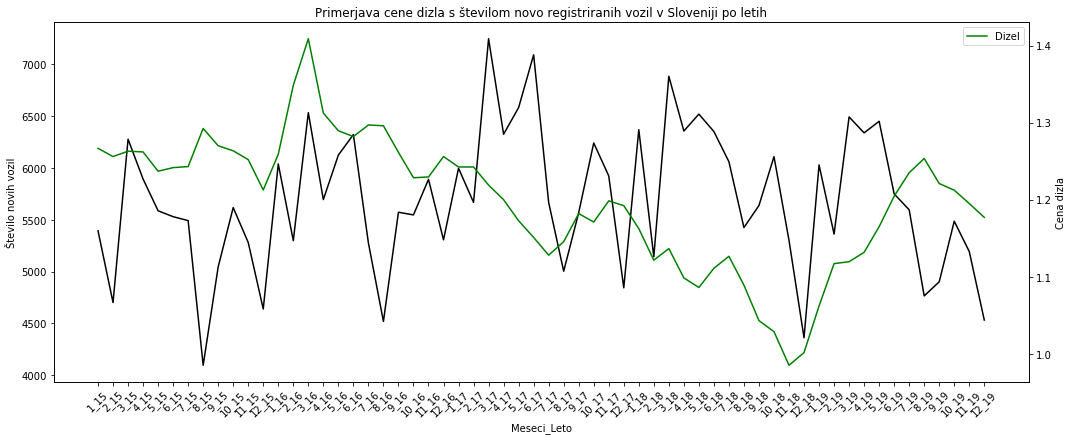

In [14]:
# Izris
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
ax1.set_xlabel('Meseci_Leto')
ax1.set_ylabel('Število novih vozil')
ax1.plot(x, y, label="Vozila", color="black")
#plt.figure(figsize=(10,10))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()

ax2.set_ylabel('Cena dizla')  # we already handled the x-label with ax1
ax2.plot(x, y_nafta, label="Dizel", color="green")
ax2.tick_params(axis='y', color="black")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()

plt.rcParams["figure.figsize"] = [15,6]
plt.title("Primerjava cene dizla s številom novo registriranih vozil v Sloveniji po letih")
plt.show()